In [21]:
# libraries
import matplotlib.pyplot as plt

In [22]:
# define a function to produce the textboxes in the tree
def knoten_text(header, underlyingValue, bondValue, payoff=None, underlyingAnteil=None, bondAnteil=None):
    text1 = header
    if underlyingValue is not None:
        text1 += f'\nWert des Underlying: {underlyingValue}'
    if bondValue is not None:
        text1 += f'\nWert des Bond: {bondValue}'
    if payoff is not None:
        text1 += f'\nPayoff der Option: {payoff}'  
    if underlyingValue is not None and bondValue is not None and underlyingAnteil is not None and bondAnteil is not None:
        text1 += f'\nWert des Hedges: {bondAnteil * bondValue + underlyingAnteil * underlyingValue:.2f}'
    return text1 
    
#print( knoten_text('Zeitpunkt T0', 100, 100, None, None, None))
#print( knoten_text('Zeitpunkt T1', 120, 80, 20, None, None))
#print( knoten_text('Zeitpunkt T1', 100, 100, None, -0.5, 2.3))
#print ( knoten_text(header='Zeitpunkt T0',underlyingValue=100,bondValue=100))

In [23]:
#define a function to plot the tree
def draw_tree(payoff1 = None, payoff2 = None, AnteileUnderlying = None, AnteileBond = None, p = None):

    fig, ax = plt.subplots()

    text1 = ''
    if AnteileUnderlying is not None:
        text1 += f'\nAnteile Underlying: {AnteileUnderlying}'
    if AnteileBond is not None:
        text1 += f'\nAnteile Bond: {AnteileBond:.2f}'
    if text1 != '':
        ax.text(-0.1, 1, text1, ha = 'right')

    # Draw the initial point at T0
    ax.plot(0, 0, 'ko')
    ax.text(-0.1, 0, knoten_text(header='Zeitpunkt T0',underlyingValue=100,bondValue=100, underlyingAnteil=AnteileUnderlying, bondAnteil=AnteileBond), ha='right',va = 'center')

    # Draw the points at T
    ax.plot(1, 1, 'ko')
    # Add the option payoff
    ax.text(1.1, 1, knoten_text(header='Zeitpunkt T1, Zustand 1', underlyingValue=120, bondValue=105, payoff=payoff1, underlyingAnteil=AnteileUnderlying, bondAnteil=AnteileBond), ha='left', va='center')
    ax.plot(1, -1, 'ko')
    ax.text(1.1, -1, knoten_text(header='Zeitpunkt T1, Zustand 2', underlyingValue=80, bondValue=105, payoff=payoff2, underlyingAnteil=AnteileUnderlying, bondAnteil=AnteileBond), ha='left', va='center')

    # Draw the arrows
    ax.arrow(0, 0, 0.9, 0.9, head_width=0.05, head_length=0.1, fc='k', ec='k')
    ax.arrow(0, 0, 0.9, -0.9, head_width=0.05, head_length=0.1, fc='k', ec='k')

    # Add the probabilities
    if p is not None:
        ax.text(0.5, 0.6, f'p = {p:.3f}', ha='right')
        ax.text(0.5, -0.7, f'(1 - p) = {1-p:.3f}', ha='right')
   
    # Set the limits and labels
    ax.set_xlim(-0.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
    ax.axis('off')

    plt.show()


# Draw the tree
#draw_tree(payoff1=20, payoff2=0, AnteileUnderlying= -0.5, AnteileBond = 60/105, p=None)

# Definition des Modells
Das Underlying und der Bond haben zum Zeitpunkt T0 beide den Wert 100. Der Wert des Bonds ist in jedem Fall zum Zeitpunkt 105, weil er mit einem konstanten Zins verzinst wird, die im Voraus fest steht. Das Underlying kann im Zeitpunkt T1 verschiedene Werte annehmen. Der Begriff Underlying beschreibt den Basiswert, der dem Derivat zugrunde liegt. Bei einem Call auf EUR-USD bspw. der EUR-USD Wechselkurs.

Hier nehmen wir ein Modell an, in dem es genau zwei mögliche Zustände im Zeitpunkt T1 geben kann, nämlich 80 und 120

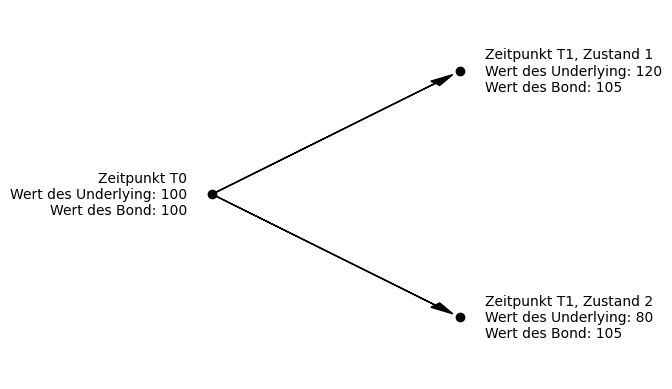

In [68]:
draw_tree()

# Aufgabe 1
Zum Zeitpunkt T1 ist eine Call-Option mit Strike 100 fällig. Welche Auszahlung erhält man in Zustand 1 und Zustand 2?

In [ ]:
#Aufgabe
draw_tree(payoff1=, payoff2=)

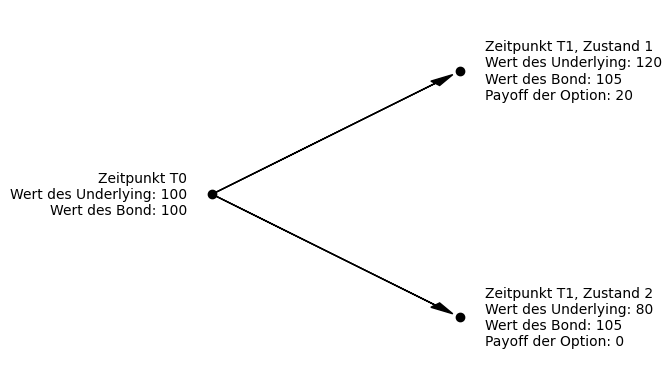

In [26]:
#Lösung
draw_tree(payoff1=20, payoff2=0)

# Aufgabe 2
Die Option soll jetzt durch ein Portfolio aus Anteilen des Underlyings und Anteilen des Bonds repliziert werden, die auch long oder short sein können (positive und negative Anteile erlaubt). Das Ziel des Replikationsportfolio ist es, bei T1 in jedem möglichen Zustand exakt die Auszahlung der Option durch den Hedge zu replizieren. In jedem Zustand muss also gelten: 

Wert des Replikationsportfolios = AnteileBond * BondValue + AnteileUnderlying * UnderlyingValue = Payoff der Option

Wenn die Bank eine solche Replikation erreichen kann, hat sie das Risiko aus der Option mitigiert. Das heißt, sie verkauft dem Kunden eine Option und nimmt ihm damit sein Risiko ab, lässt dieses Risiko aber selbst nicht offen, sondern kann das Risiko durch den Hedge glattstellen. 

Wie viele Anteile des Bonds und der Option muss man zu heute kaufen, um in T1 in jedem möglichen Zustand exakt die Auszahlung der Option durch den Hedge zu replizieren? 

In [ ]:
draw_tree(payoff1=???, payoff2=???, AnteileBond=???, AnteileUnderlying=???)

anteileBond: -0.38095238095238093, anteileUnderlying: 0.5


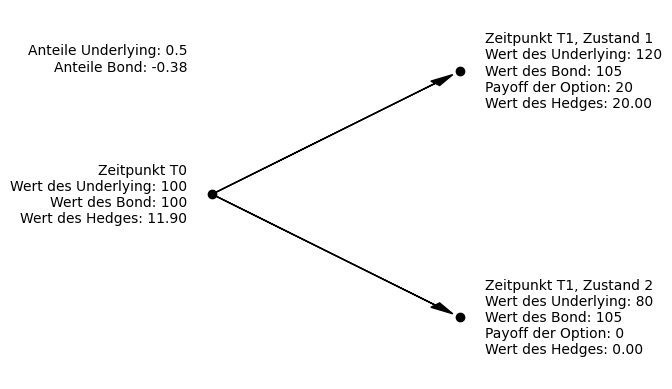

In [27]:
#Lösung

import numpy as np

# Coefficients of the equations
A = np.array([[105, 120], [105, 80]])

# Constants on the right-hand side of the equations
B = np.array([20, 0])

# Solve the system of linear equations
solution = np.linalg.solve(A, B)

anteileBond, anteileUnderlying = solution

print(f"anteileBond: {anteileBond}, anteileUnderlying: {anteileUnderlying}")

draw_tree(payoff1=20, payoff2=0, AnteileBond=anteileBond, AnteileUnderlying=anteileUnderlying)

Der Wert des Hedges heute ist 11,90. Der Hedge hat das gleiche Auszahlungsprofil wie die Option. Das bedeutet, er produziert in jedem Zustand der Welt bei T1 den gleichen Cashflow wie die Option. Damit folgt aus dem No Arbitrage Argument, dass der Hedge den gleichen Preis haben muss wie die Option. Ansonsten könnte man das eine kaufen und das andere verkaufen und hätte einen sicheren Gewinn. Bei komplizierten Modellen hat man mehr als zwei Zustände, sondern in der Regel eine kontinuierliche Verteilung. Außerdem kann man mehrere Zeitpunkte und mehrere Underlyings haben. Die Replikationsstrategie ist dann nicht mehr statisch, wie in diesem Beispiel, sondern benötigt dynamisches Hedging. Deshalb ist es einfacher, den Wert der Option über eine Wahrscheinlichkeitsverteilung bestimmen zu können. Das Wahrscheinlichkeitsmaß wird aber über die Replikationsstrategie definiert.


# Aufgabe 3
Was ist im gegebenen Beispiel das Wahrscheinlichkeitsmaß, das im Erwartungswert genau den Wert des Hedges ergibt? Da wir nur zwei Zustände haben, kann man den Erwartungswert als diskrete Summe berechnen

Der Erwartungswert des Payoffs der Call-Option ist die Wahrscheinlichkeit für den Zustand 1 multipliziert mit der Auszahlung im Zustand 1 plus die  Wahrscheinlichkeit für den Zustand 2 multipliziert mit der Auszahlung im Zustand 2 

$$\mathbb{E}(X) = \sum_i p_i X_i$$

Dieser Wert soll heute dem Wert des Hedges=Replikationsportolio entsprechen

In [28]:
draw_tree(payoff1=???, payoff2=???, AnteileBond=anteileBond=???, AnteileUnderlying=???, p=???)

<class 'SyntaxError'>: invalid syntax (<ipython-input-28-59a33e681cab>, line 1)

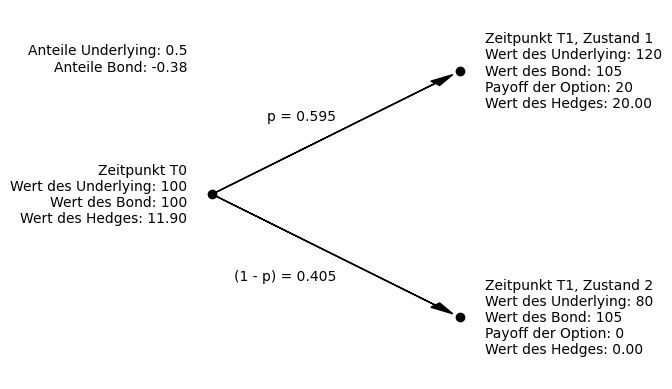

In [31]:
# Lösung
# 11.90 = p * 20 + (1 - p) * 0

p = (anteileBond*100+ anteileUnderlying*100) /20

draw_tree(payoff1=20, payoff2=0, AnteileBond=anteileBond, AnteileUnderlying=anteileUnderlying, p=p)

Fazit:

Der Preis der Option entspricht dem heutigen Wert der Replikations-Strategie (11.90 JPY / USD)

Der Preis der Option kann mit dem risikoneutralen Wahrscheinlichkeitsmaß bestimmt werden: $$\mathbb{E}(X) = \sum_i p_i X_i =  0.595 \cdot 20 + (1-0.595) \cdot 0= 11.90 $$